# CAR  PRICE  PREDICTION

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
import warnings #avoid warning flash
warnings.filterwarnings('ignore')

In [5]:
data=pd.read_csv("car data.csv")
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
data.shape

(301, 9)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# EDA

In [9]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [10]:
final_dataset=data.iloc[:,1:]
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [11]:
print(final_dataset['Fuel_Type'].unique())
print(final_dataset['Seller_Type'].unique())
print(final_dataset['Transmission'].unique())
print(final_dataset['Owner'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [12]:
final_dataset['no_year']=2021-data['Year']
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [13]:
final_dataset.drop(['Year'],axis=1,inplace=True)
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [14]:
catgeorical=[feature for feature in final_dataset.columns if final_dataset[feature].dtypes=='O']
print(catgeorical)

['Fuel_Type', 'Seller_Type', 'Transmission']


In [15]:
## one hot encoding
final_dataset=pd.get_dummies(final_dataset,drop_first=True)

In [16]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [17]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


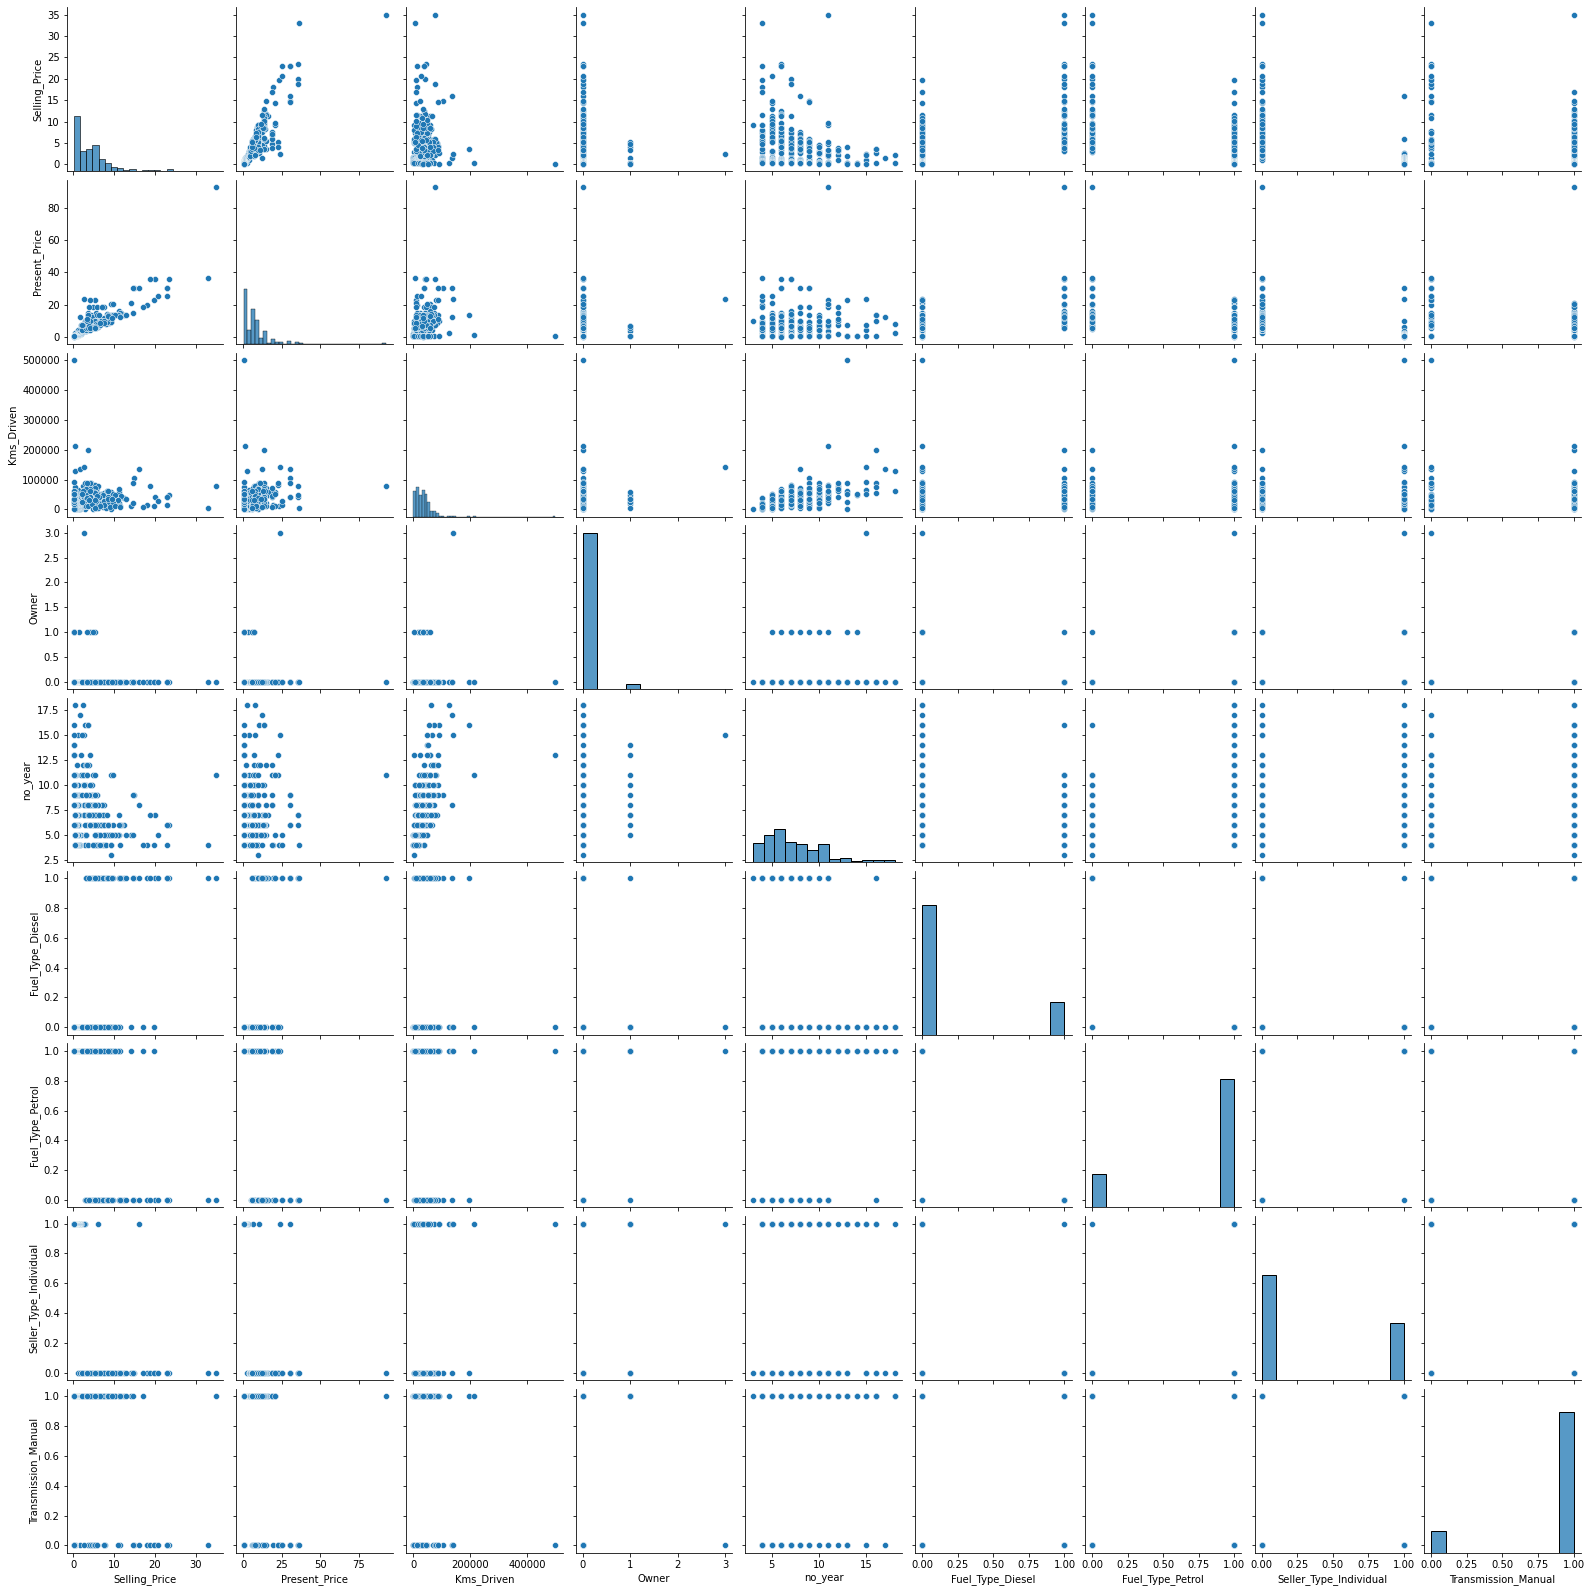

In [18]:
## correlation between features
sns.pairplot(final_dataset)

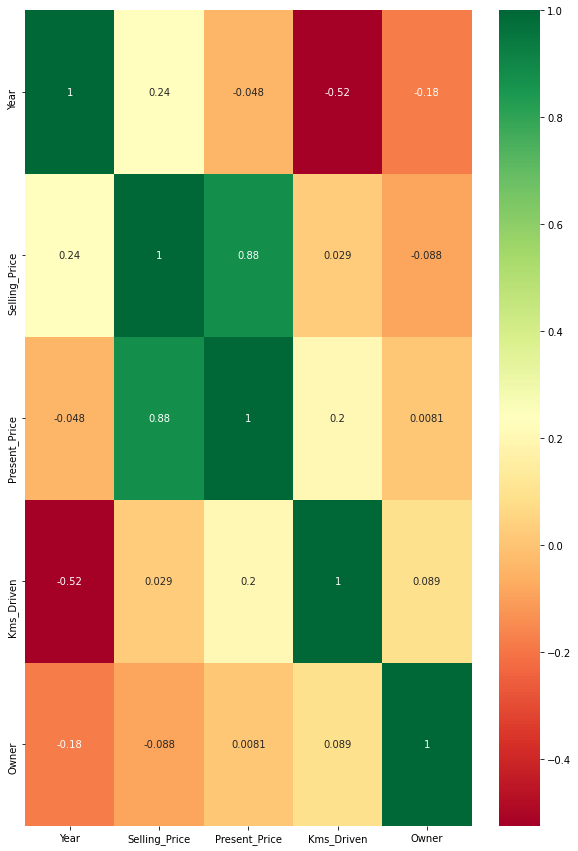

In [19]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,15))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

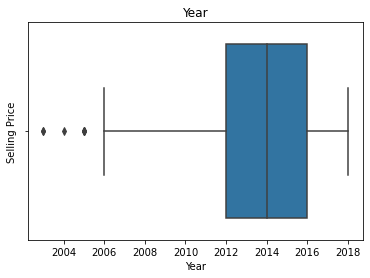

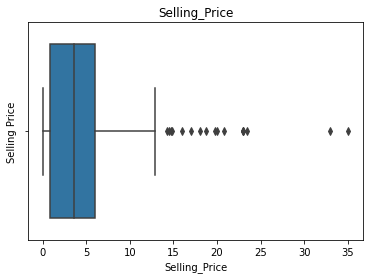

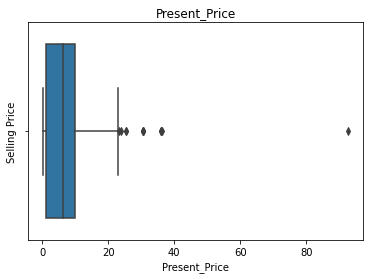

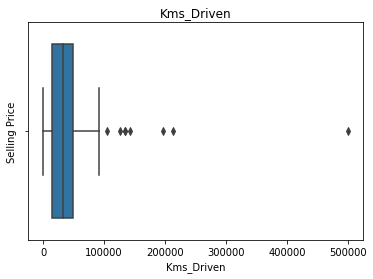

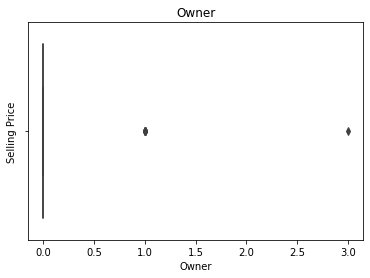

In [24]:
numerical=[feature for feature in data.columns if data[feature].dtypes!='O']
for feature in numerical:
    sns.boxplot(data[feature])
    plt.xlabel(feature)
    plt.ylabel("Selling Price")
    plt.title(feature)
    plt.show()

In [21]:
## handling outliers
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [26]:
IQR=final_dataset['Selling_Price'].quantile(0.75)-final_dataset['Selling_Price'].quantile(0.25)
upper=final_dataset['Selling_Price'].quantile(0.75)+(IQR*1.5)
lower=final_dataset['Selling_Price'].quantile(0.25)-(IQR*1.5)
print(lower,upper)

-6.749999999999999 13.649999999999999


In [27]:
final_dataset.loc[final_dataset['Selling_Price']>=13.64,'Selling_Price']=13.64
final_dataset.loc[final_dataset['Selling_Price']<=-6.74,'Selling_Price']=-6.74

In [28]:
IQR=final_dataset['Present_Price'].quantile(0.75)-final_dataset['Present_Price'].quantile(0.25)
upper=final_dataset['Present_Price'].quantile(0.75)+(IQR*1.5)
lower=final_dataset['Present_Price'].quantile(0.25)-(IQR*1.5)
print(lower,upper)

-11.850000000000001 22.950000000000003


In [29]:
final_dataset.loc[final_dataset['Present_Price']>=22.95,'Present_Price']=22.95
final_dataset.loc[final_dataset['Present_Price']<=-11.85,'Present_Price']=-11.85

In [30]:
IQR=final_dataset['Kms_Driven'].quantile(0.75)-final_dataset['Kms_Driven'].quantile(0.25)
upper=final_dataset['Kms_Driven'].quantile(0.75)+(IQR*1.5)
lower=final_dataset['Kms_Driven'].quantile(0.25)-(IQR*1.5)
print(lower,upper)

-35650.5 99417.5


In [31]:
final_dataset.loc[final_dataset['Kms_Driven']>=99417.5,'Kms_Driven']=99417.5
final_dataset.loc[final_dataset['Kms_Driven']<=0,'Kms_Driven']=0

In [33]:
X=final_dataset.iloc[:,1:]
y=final_dataset.iloc[:,0]

In [34]:
X['Owner'].unique()

array([0, 1, 3], dtype=int64)

# Feature Selection

In [35]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [36]:
print(model.feature_importances_)

[0.5365752  0.03632316 0.00081483 0.10083569 0.03832957 0.03356163
 0.23923623 0.01432367]


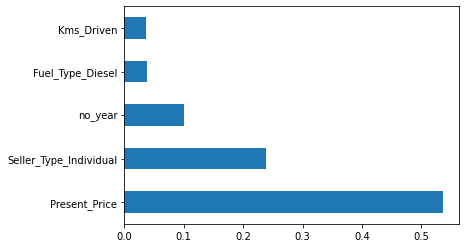

In [41]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_,index =X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

# Model Building

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Decision Tree Regressor

In [44]:
# DecisionTreeRegressor
decision_model=DecisionTreeRegressor(max_depth=20)
decision_model.fit(X_train,y_train)
decision_model.score(X_train,y_train)

1.0

In [45]:
decision_model.score(X_test,y_test)

0.8310830315793974

In [46]:
y_pred=decision_model.predict(X_test)

In [47]:
from sklearn import metrics
metrics.r2_score(y_test, y_pred)

0.8310830315793974

In [48]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.743956043956044
MSE: 2.3641802197802195
RMSE: 1.5375890932821485


# Random Forest Regressor

In [78]:
# RandomForestRegressor
randomforest_model=RandomForestRegressor(max_depth=25)
randomforest_model.fit(X_train,y_train)
randomforest_model.score(X_train,y_train)

0.9916097878274488

In [79]:
randomforest_model.score(X_test,y_test)

0.9623020405571081

In [80]:
y_pred=randomforest_model.predict(X_test)

In [82]:
from sklearn import metrics
metrics.r2_score(y_test, y_pred)

0.9623020405571081

In [83]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.5098494505494501
MSE: 0.5276247310989011
RMSE: 0.7263778156709503


# XGB Regressor

In [54]:
##XGBRegressor
xbg_model=XGBRegressor(n_estimators=100,max_depth=20)
xbg_model.fit(X_train,y_train)
xbg_model.score(X_train,y_train)

0.9999999535636254

In [55]:
xbg_model.score(X_test,y_test)

0.9581393331024899

In [56]:
y_pred=xbg_model.predict(X_test)

In [57]:
from sklearn import metrics
metrics.r2_score(y_test, y_pred)

0.9581393331024899

In [58]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.5066582088483559
MSE: 0.5858864363435453
RMSE: 0.7654321892522846


# Linear Regression

In [59]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_predict=lr.predict(X_test)
print(lr.score(X_test,y_test))

0.9010031021790328


In [60]:
print('MAE:', metrics.mean_absolute_error(y_test, y_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

MAE: 0.8730740414219026
MSE: 1.3855713243986199
RMSE: 1.1771029370444286


In [63]:
row=[['Decision Tree Regressor',round(0.743956043956044,4),round(2.3641802197802195,4), round(1.5375890932821485,4)],
     ['Random Forest Regressor',round(0.5203571428571425,4),round(0.5357094699999989,4), round(0.73192176494486,4)],
     ['XGB Regressor',round(0.5066582088483559,4),round(0.5858864363435453,4),  round(0.7654321892522846,4)],
    ['Linear Regression',round(0.8730740414219026,4),round(1.3855713243986199,4),  round(1.1771029370444286,4)]]
column=['Model','MAE','MSE','RMSE']
js=pd.DataFrame(row,columns=column)
js.to_json('Model_Metrics.json')

In [64]:
js

,Model,MAE,MSE,RMSE
0,Decision Tree Regressor,0.7440,2.3642,1.5376
1,Random Forest Regressor,0.5204,0.5357,0.7319
2,XGB Regressor,0.5067,0.5859,0.7654
3,Linear Regression,0.8731,1.3856,1.1771


In [ ]:
## Hyperpeameter Tunned with Random Forest Model

In [65]:
##Random Forest Regressor
regressor=RandomForestRegressor()

In [66]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [67]:
from sklearn.model_selection import RandomizedSearchCV

In [68]:
random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)],
               'max_features': ['auto', 'sqrt'],
               'max_depth':[int(x) for x in np.linspace(5, 30, num = 6)],
               'min_samples_split':[2, 5, 10, 15, 100],
               'min_samples_leaf':  [1, 2, 5, 10]}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [69]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [70]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [71]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [72]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [73]:
rf_random.best_score_

-1.0526614573852124

In [74]:
predictions=rf_random.predict(X_test)

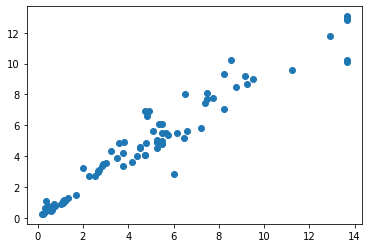

In [75]:
plt.scatter(y_test,predictions)

In [84]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.5956017582417572
MSE: 0.8657385920615434
RMSE: 0.9304507467144854


In [88]:
import pickle
file = open('Random_Forest_regressor.pkl', 'wb')
pickle.dump(rf_random, file)

In [89]:
round(np.log)

13.955272500339433